In [2]:
import matplotlib
import pandas as pd
import json
import numpy as np
from matplotlib import pyplot as plt

dataset = "/Users/bruno/Desktop/data_modeling/datasets/winemag-data-130k-v2.csv"
data = pd.read_csv(dataset, index_col=0)

%matplotlib inline

In [3]:
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
data['price'].min(), data['price'].max()

(4.0, 3300.0)

In [5]:
#pearson correlation
data['price'].corr(data['points'])

0.41616674186062175

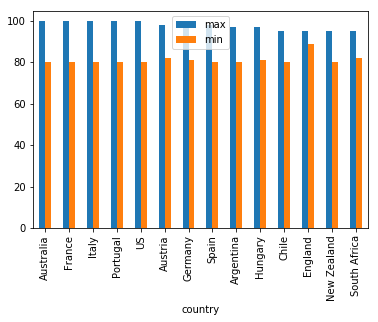

In [6]:
#values_country
values_country = data.groupby('country').points.agg(['max','min'])
values_country_plot = values_country[values_country['max'] >= 95]
values_country_plot.sort_values('max',ascending=False).plot(kind='bar')

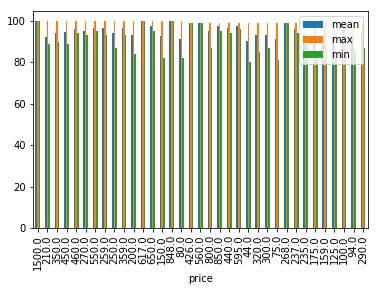

In [7]:
values_price = data.groupby('price').points.agg(['mean','max','min'])
values_price_plot = values_price[values_price['max'] >= 99]
values_price_plot.sort_values('max',ascending=False).plot(kind='bar')

In [8]:
#values_country

cluster_points = data[data['points'] >= 95]
#values_points = data.groupby('country').points.agg(['max','min'])
#values_points_plot = values_country[values_country['max'] >= 95]
#values_points_plot.sort_values('max',ascending=False).plot(kind='bar')
#print(cluster_points)
#cluster_points.head(3)
cluster_points.count()

country                  2416
description              2416
designation              1933
points                   2416
price                    2211
province                 2416
region_1                 2113
region_2                  964
taster_name              1888
taster_twitter_handle    1845
title                    2416
variety                  2416
winery                   2416
dtype: int64

In [9]:
cluster_points_dp = cluster_points.drop_duplicates(keep=False)
cluster_points_dp.count()

country                  2368
description              2368
designation              1895
points                   2368
price                    2169
province                 2368
region_1                 2067
region_2                  940
taster_name              1852
taster_twitter_handle    1809
title                    2368
variety                  2368
winery                   2368
dtype: int64

In [10]:
cluster_points_dp.head(2)
cluster_points_dp_clone = cluster_points_dp.copy()

In [11]:
cluster_points_dp_clone.count()

country                  2368
description              2368
designation              1895
points                   2368
price                    2169
province                 2368
region_1                 2067
region_2                  940
taster_name              1852
taster_twitter_handle    1809
title                    2368
variety                  2368
winery                   2368
dtype: int64

In [12]:
#countries = cluster_points_dp['country'].drop_duplicates(keep=False)
#countries.count()
countries = cluster_points_dp['country'].drop_duplicates(keep='first')
provinces = cluster_points_dp['province'].drop_duplicates(keep='first')
regions_1 = cluster_points_dp['region_1'].drop_duplicates(keep='first')
titles = cluster_points_dp['title'].drop_duplicates(keep='first')
varieties = cluster_points_dp['variety'].drop_duplicates(keep='first')
wineries = cluster_points_dp['winery'].drop_duplicates(keep='first')
designations = cluster_points_dp['designation'].drop_duplicates(keep='first')

country_dic = {}
provinces_dic = {}
regions_1_dic = {}
titles_dic = {}
varieties_dic = {}
wineries_dic = {}
designations_dic = {}

#print(country_dic)

#print(countries.count())

i = 1
for country in countries:
    country_dic.update({country:i})
    i = i + 1

i = 1
for province in provinces:
    provinces_dic.update({province:i})
    i = i + 1

i = 1
for region_1 in regions_1:
    regions_1_dic.update({region_1:i})
    i = i + 1

i = 1
for title in titles:
    titles_dic.update({title:i})
    i = i + 1

i = 1
for variety in varieties:
    varieties_dic.update({variety:i})
    i = i + 1

i = 1
for winery in wineries:
    wineries_dic.update({winery:i})
    i = i + 1

i = 1
for designation in designations:
    designations_dic.update({designation:i})
    i = i + 1
 
print(designations_dic)
#print(country_dic)
#print(provinces_dic)
#print(regions_1_dic)
#print(titles_dic)
#print(varieties_dic)
#print(wineries_dic)

{'Rare': 1, 'Kiedrich Gräfenberg Trockenbeerenauslese': 2, 'Grand': 3, 'RunRig': 4, 'Vignolo Riserva': 5, 'Eszencia': 6, 'South River': 7, 'Le Montrachet': 8, 'Kiedrich Gräfenberg Beerenauslese': 9, 'Sweetwater': 10, "Georgia's Paddock": 11, 'Vieilles Vignes': 12, 'Hattenheimer Hassel Auslese': 13, 'Les Chenevottes Premier Cru': 14, 'Descendant': 15, 'Simposio': 16, 'Jamie': 17, nan: 18, 'Weber Vineyard': 19, 'Precious Mountain Vineyard': 20, 'Red Wine': 21, 'Guado al Tasso': 22, 'Sassicaia': 23, 'Ornellaia': 24, 'No. 1': 25, 'Allen Vineyard': 26, 'Argentiera': 27, 'Reserve': 28, 'Rochioli Riverblock Vineyard': 29, 'Ellen Lane Estate': 30, 'Viña El Pison': 31, "Rocche dell'Annunziata": 32, 'Villero': 33, 'Cerretta': 34, 'Boito Riserva': 35, 'Estates Reserve': 36, 'Hillside Reserve': 37, 'San Andreas': 38, 'Chaleur Estate Blanc': 39, 'Barrel Sample': 40, 'The Traveler': 41, 'Contrada R': 42, 'Rocky Knoll': 43, 'Golden Mean': 44, 'Reed': 45, 'Mother Rock': 46, 'Single Vineyard Reserve': 

In [13]:
cluster_int = cluster_points_dp_clone.replace({'country': country_dic, 'designation': designations_dic, 'province': provinces_dic, 'region_1': regions_1_dic, 'variety': varieties_dic, 'winery': wineries_dic, 'title':titles_dic})
cluster_int.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
345,1,This wine contains some material over 100 year...,1,100,350.0,1,1,NaN,Joe Czerwinski,@JoeCz,1,1,1
346,1,"This deep brown wine smells like a damp, mossy...",1,98,350.0,1,1,NaN,Joe Czerwinski,@JoeCz,2,2,1


In [14]:
#cluster_int['points'].corr(cluster_int['country'])
cluster_int.corr(method='pearson')
#cluster_points_dp_clone['country'].astype(str).astype(int)
#cluster_points_dp_clone['designation'].astype(str).astype(int)
#cluster_points_dp_clone['province'].astype(str).astype(int)
#cluster_points_dp_clone['region_1'].astype(str).astype(int)
#cluster_points_dp_clone['title'].astype(str).astype(int)
#cluster_points_dp_clone['variety'].astype(str).astype(int)
#cluster_points_dp_clone['winery'].astype(str).astype(int)

#cluster_points_dp_clone.dtypes

,country,designation,points,price,province,region_1,title,variety,winery
country,1.000000,0.087499,-0.075468,-0.039052,0.581639,-0.150425,0.074280,0.140937,0.048415
designation,0.087499,1.000000,-0.072268,-0.167633,0.185577,0.057965,0.537409,0.127691,0.416264
points,-0.075468,-0.072268,1.000000,0.295735,-0.070018,-0.032551,0.032471,-0.021331,-0.118304
price,-0.039052,-0.167633,0.295735,1.000000,-0.053003,0.054258,-0.042448,-0.061121,-0.101607
province,0.581639,0.185577,-0.070018,-0.053003,1.000000,-0.042638,0.070361,0.448748,0.171996
region_1,-0.150425,0.057965,-0.032551,0.054258,-0.042638,1.000000,0.058051,0.165724,0.208886
title,0.074280,0.537409,0.032471,-0.042448,0.070361,0.058051,1.000000,0.039291,0.424585
variety,0.140937,0.127691,-0.021331,-0.061121,0.448748,0.165724,0.039291,1.000000,0.185753
winery,0.048415,0.416264,-0.118304,-0.101607,0.171996,0.208886,0.424585,0.185753,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116d7eb70>,
      dtype=object)

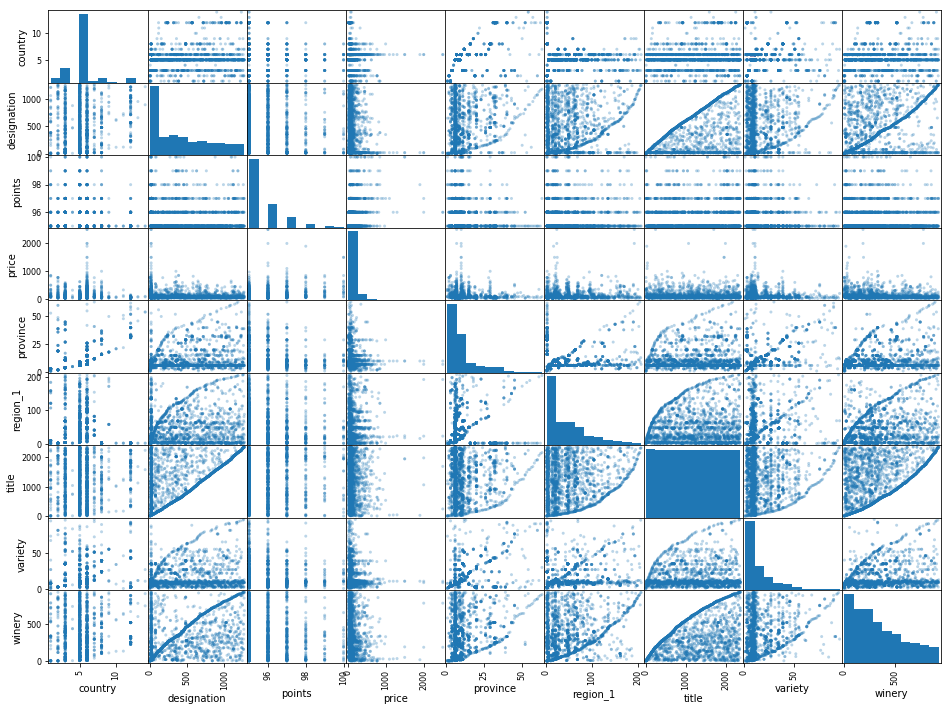

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(cluster_int, figsize=(16,12), alpha=0.3)

#import seaborn as sb
#sb.pairplot(cluster_int)
#sb.heatmap(cluster_int, xticklabels=cluster_int.columns.values, yticklabels=cluster_int.columns.values)

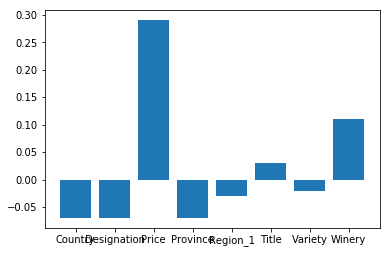

In [16]:
y_axis = [-0.07, -0.07, 0.29, -0.07, -0.03, 0.03, -0.02, 0.11]
x_axis = ['Country', 'Designation', 'Price', 'Province', 'Region_1', 'Title', 'Variety', 'Winery']
index = np.arange(len(x_axis))
plt.bar(index, y_axis, align='center', alpha=1)
plt.xticks(index, x_axis)
plt.show()

([<matplotlib.axis.XTick at 0x11ce252b0>,
 <a list of 16 Text xticklabel objects>)

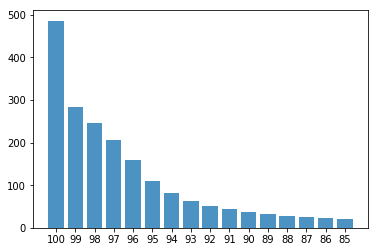

In [17]:
cluster_100 = data[data['points'] == 100]
cluster_99 = data[data['points'] == 99]
cluster_98 = data[data['points'] == 98]
cluster_97 = data[data['points'] == 97]
cluster_96 = data[data['points'] == 96]
cluster_95 = data[data['points'] == 95]
cluster_94 = data[data['points'] == 94]
cluster_93 = data[data['points'] == 93]
cluster_92 = data[data['points'] == 92]
cluster_91 = data[data['points'] == 91]
cluster_90 = data[data['points'] == 90]
cluster_89 = data[data['points'] == 89]
cluster_88 = data[data['points'] == 88]
cluster_87 = data[data['points'] == 87]
cluster_86 = data[data['points'] == 86]
cluster_85 = data[data['points'] == 85]

cluster_100['price'].mean()
cluster_99['price'].mean()
cluster_98['price'].mean()
cluster_97['price'].mean()
cluster_96['price'].mean()
cluster_95['price'].mean()
cluster_94['price'].mean()
cluster_93['price'].mean()
cluster_92['price'].mean()
cluster_91['price'].mean()
cluster_90['price'].mean()
cluster_89['price'].mean()
cluster_88['price'].mean()
cluster_87['price'].mean()
cluster_86['price'].mean()
cluster_85['price'].mean()

y_axis = [cluster_100['price'].mean(), cluster_99['price'].mean()
, cluster_98['price'].mean(), cluster_97['price'].mean(), cluster_96['price'].mean(), cluster_95['price'].mean(), cluster_94['price'].mean(), cluster_93['price'].mean(), cluster_92['price'].mean(), cluster_91['price'].mean(), cluster_90['price'].mean(), cluster_89['price'].mean(), cluster_88['price'].mean(), cluster_87['price'].mean(), cluster_86['price'].mean(), cluster_85['price'].mean()]
x_axis = ['100', '99', '98', '97', '96', '95', '94', '93', '92', '91', '90', '89', '88', '87', '86', '85']
index = np.arange(len(x_axis))
plt.bar(index, y_axis, align='center', alpha=0.8)
plt.xticks(index, x_axis)